For the polynomial kernel, as we increase the degree, the SVM tries to fit the data more closely. Rather than find the "natural" fit, it will overfit to try to define classes more strictly. As we increase C, the SVM reduces the misclassification tolerance. In other words, the decision boundaries fit more tightly to the classes since it allows less room for misclassification.

For the gaussian kernel, as we increase sigma, the SVM tries to fit the data less closely. Rather than find the "natural" fit, it will underfit to try to define classes more loosely. In other words, it allows certain classes to encompass a larger portion of the data. As we increase C, the same phenomenon occurs as with the polynomial kernel. The decision boundaries for the classes are tightened, reducing the amount of data points that may be misclassified. 

In [24]:
"""
=====================================
Test SVM with custom Gaussian kernels
=====================================


Author: Eric Eaton, 2014

Adapted from scikit_learn documentation.

"""
print(__doc__)

from numpy import loadtxt, ones, zeros, where
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from svmKernels import myGaussianKernel
from svmKernels import _gaussSigma

# import some data to play with

filename = 'data/svmTuningData.dat'
data = loadtxt(filename, delimiter=',')
X_raw = data[:, 0:-1]
Y_raw = np.squeeze(np.array([data[:, 2]]).T)
m, d = X_raw.shape
#print(m,d)

print("Training the SVMs...")

trials = 5
folds = 10
fold_size = m//folds
train_size = fold_size * (folds - 1)
#print(fold_size, train_size)
validation_size = fold_size

# Best parameters
best=[0,0,0]

# Search parameters through a grid 
sigma_vals = 10**np.arange(-3., 5.)
C_vals = np.linspace(1,100, num=100)

for c in range(0,100):
    for g in range(0,8):
      C = C_vals[c]
      _gaussSigma = sigma_vals[g]
      accuracy = 0
      accuracies = []
    
      for t in range(0,trials):  
        
        #randomize the data set
        p = np.random.permutation(m)
        order = p[0:m]
        X = X_raw[order,:]
        Y = Y_raw[order]
    
        for f in range(0,folds):

            #cross validation: get train set and test set   
            X_train = np.row_stack([X[:f*fold_size,:], X[f*fold_size+fold_size:,:]])
            Y_train = np.concatenate([Y[:f*fold_size], Y[f*fold_size+fold_size:]])
            X_test = X[f*fold_size:f*fold_size+fold_size,:]
            Y_test = Y[f*fold_size:f*fold_size+fold_size]
 
            # create an instance of SVM with build in RBF kernel and train it
            equivalentGamma = 1.0 / (2 * _gaussSigma ** 2)
            model = svm.SVC(C=C, kernel='rbf', gamma=equivalentGamma)
            model.fit(X_train, Y_train)

            predictions_test = model.predict(np.c_[X_test[:,0],X_test[:,1]])
            a = np.mean(Y_test==predictions_test)
            accuracy += a
            accuracies.append(a)
             
      # Best Accuracy So Far
      average_accuracy = accuracy/(folds*trials)
      if average_accuracy > best[2]:
          best[0] = C
          best[1] = _gaussSigma
          best[2] = average_accuracy
            
      mean = "{:.4f}".format(round(average_accuracy, 4))
      std = "{:.4f}".format(round(np.std(np.array(accuracies)), 4))
      print(f"(C = {C}, sigma = {_gaussSigma}): mean = {mean}, std = {std}")

print(best)      


Test SVM with custom Gaussian kernels


Author: Eric Eaton, 2014

Adapted from scikit_learn documentation.


Training the SVMs...
(C = 1.0, sigma = 0.001): mean = 0.5615, std = 0.1123
(C = 1.0, sigma = 0.01): mean = 0.5831, std = 0.1241
(C = 1.0, sigma = 0.1): mean = 0.6292, std = 0.1266
(C = 1.0, sigma = 1.0): mean = 0.9123, std = 0.0785
(C = 1.0, sigma = 10.0): mean = 0.8031, std = 0.1100
(C = 1.0, sigma = 100.0): mean = 0.6631, std = 0.1258
(C = 1.0, sigma = 1000.0): mean = 0.5462, std = 0.1101
(C = 1.0, sigma = 10000.0): mean = 0.5462, std = 0.1470
(C = 2.0, sigma = 0.001): mean = 0.5615, std = 0.1214
(C = 2.0, sigma = 0.01): mean = 0.5815, std = 0.1351
(C = 2.0, sigma = 0.1): mean = 0.6308, std = 0.1066
(C = 2.0, sigma = 1.0): mean = 0.9369, std = 0.0733
(C = 2.0, sigma = 10.0): mean = 0.8262, std = 0.1053
(C = 2.0, sigma = 100.0): mean = 0.6846, std = 0.1387
(C = 2.0, sigma = 1000.0): mean = 0.5462, std = 0.1533
(C = 2.0, sigma = 10000.0): mean = 0.5462, std = 0.1154
(C = 3.0, s

The best parameters are:  [85.0, 10.0, 0.9846153846153846]


<ipython-input-25-601e104b9550>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predictions, cmap="Paired")


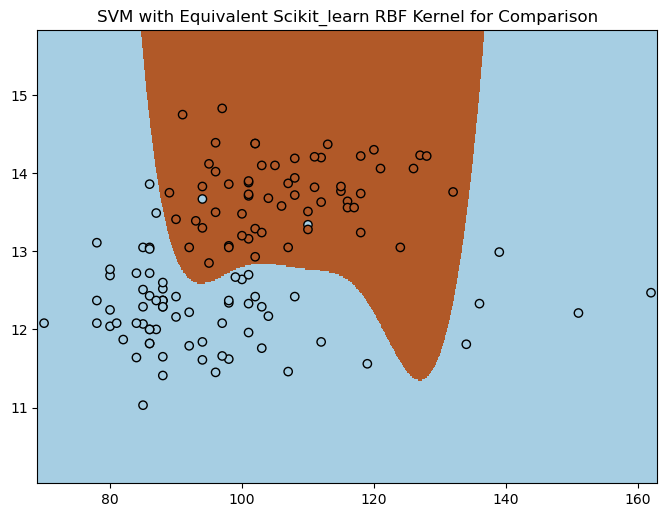

In [25]:
# create an instance of SVM with build in RBF kernel and train it
print("The best parameters are: ", best)
C = best[0]
_gaussSigma = best[1]
equivalentGamma = 1.0 / (2 * _gaussSigma ** 2)
model = svm.SVC(C=C, kernel='rbf', gamma=equivalentGamma)
model.fit(X, Y)

h = .02  # step size in the mesh

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


predictions = model.predict(np.c_[xx.ravel(), yy.ravel()])
predictions = predictions.reshape(xx.shape)

# plot my results
plt.figure(figsize=(8, 6), dpi=100)

plt.pcolormesh(xx, yy, predictions, cmap="Paired")
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="Paired", edgecolors="black")  # Plot the training points
plt.title('SVM with Equivalent Scikit_learn RBF Kernel for Comparison')
plt.axis('tight')

plt.show()

 Report optimal values and the corresponding estimated accuracy. And explain how you find those optimal values.
 

The optimal values are $C = 85.0$ and $\sigma = 10.0$, yielding an estimated accruacy of 0.9846153846153846. I found those optimal values using the cross-fold validation method implemented above with 5 trials and 10 folds each.